# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å—Ç–æ–∏–º–æ—Å—Ç–∏ –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π

–°–µ—Ä–≤–∏—Å –ø–æ –ø—Ä–æ–¥–∞–∂–µ –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π —Å –ø—Ä–æ–±–µ–≥–æ–º ¬´–ù–µ –±–∏—Ç, –Ω–µ –∫—Ä–∞—à–µ–Ω¬ª —Ä–∞–∑—Ä–∞–±–∞—Ç—ã–≤–∞–µ—Ç –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ –¥–ª—è –ø—Ä–∏–≤–ª–µ—á–µ–Ω–∏—è –Ω–æ–≤—ã—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤. –í –Ω—ë–º –º–æ–∂–Ω–æ –±—ã—Å—Ç—Ä–æ —É–∑–Ω–∞—Ç—å —Ä—ã–Ω–æ—á–Ω—É—é —Å—Ç–æ–∏–º–æ—Å—Ç—å —Å–≤–æ–µ–≥–æ –∞–≤—Ç–æ–º–æ–±–∏–ª—è. –í –≤–∞—à–µ–º —Ä–∞—Å–ø–æ—Ä—è–∂–µ–Ω–∏–∏ –∏—Å—Ç–æ—Ä–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ: —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–∏–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏, –∫–æ–º–ø–ª–µ–∫—Ç–∞—Ü–∏–∏ –∏ —Ü–µ–Ω—ã –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π. –í–∞–º –Ω—É–∂–Ω–æ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –º–æ–¥–µ–ª—å –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å—Ç–æ–∏–º–æ—Å—Ç–∏. 

–ó–∞–∫–∞–∑—á–∏–∫—É –≤–∞–∂–Ω—ã:

- –∫–∞—á–µ—Å—Ç–≤–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è;
- —Å–∫–æ—Ä–æ—Å—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è;
- –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è.

In [1]:
import os

import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)

import seaborn as sns
sns.set_context('notebook', font_scale=1.5)
sns.set_style('darkgrid', rc={'ytick.left':True, 'ytick.direction':'in',
                              'xtick.bottom':True, 'xtick.direction':'in'})

from pandas_profiling import ProfileReport

In [2]:
# import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [3]:
def get_data(filename):
    
    """
    Reads the data from the given path.
    """

    pth1 = f'/datasets/{filename}'
    pth2 = f'data/{filename}'

    if os.path.exists(pth1):
        df = pd.read_csv(pth1)
        print(f'Reading {pth1}...')
    elif os.path.exists(pth2):
        df = pd.read_csv(pth2)
        print(f'Reading {pth2}...')
    else:
        print('Check the file path')

    return df

## –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö

`DateCrawled` ‚Äî –¥–∞—Ç–∞ —Å–∫–∞—á–∏–≤–∞–Ω–∏—è –∞–Ω–∫–µ—Ç—ã –∏–∑ –±–∞–∑—ã

`VehicleType` ‚Äî —Ç–∏–ø –∞–≤—Ç–æ–º–æ–±–∏–ª—å–Ω–æ–≥–æ –∫—É–∑–æ–≤–∞

`RegistrationYear` ‚Äî –≥–æ–¥ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏ –∞–≤—Ç–æ–º–æ–±–∏–ª—è

`Gearbox` ‚Äî —Ç–∏–ø –∫–æ—Ä–æ–±–∫–∏ –ø–µ—Ä–µ–¥–∞—á

`Power` ‚Äî –º–æ—â–Ω–æ—Å—Ç—å (–ª. —Å.)

`Model` ‚Äî –º–æ–¥–µ–ª—å –∞–≤—Ç–æ–º–æ–±–∏–ª—è

`Kilometer` ‚Äî –ø—Ä–æ–±–µ–≥ (–∫–º)

`RegistrationMonth` ‚Äî –º–µ—Å—è—Ü —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏ –∞–≤—Ç–æ–º–æ–±–∏–ª—è

`FuelType` ‚Äî —Ç–∏–ø —Ç–æ–ø–ª–∏–≤–∞

`Brand` ‚Äî –º–∞—Ä–∫–∞ –∞–≤—Ç–æ–º–æ–±–∏–ª—è

`NotRepaired` ‚Äî –±—ã–ª–∞ –º–∞—à–∏–Ω–∞ –≤ —Ä–µ–º–æ–Ω—Ç–µ –∏–ª–∏ –Ω–µ—Ç

`DateCreated` ‚Äî –¥–∞—Ç–∞ —Å–æ–∑–¥–∞–Ω–∏—è –∞–Ω–∫–µ—Ç—ã

`NumberOfPictures` ‚Äî –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ñ–æ—Ç–æ–≥—Ä–∞—Ñ–∏–π –∞–≤—Ç–æ–º–æ–±–∏–ª—è

`PostalCode` ‚Äî –ø–æ—á—Ç–æ–≤—ã–π –∏–Ω–¥–µ–∫—Å –≤–ª–∞–¥–µ–ª—å—Ü–∞ –∞–Ω–∫–µ—Ç—ã (–ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è)

`LastSeen` ‚Äî –¥–∞—Ç–∞ –ø–æ—Å–ª–µ–¥–Ω–µ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è


In [4]:
file_name = 'autos.csv'

init_df = get_data(file_name)
df = get_data(file_name)

df.head()

Reading data/autos.csv...
Reading data/autos.csv...


DateCrawled  Price VehicleType  RegistrationYear Gearbox  Power  \
0  2016-03-24 11:52:17    480         NaN              1993  manual      0   
1  2016-03-24 10:58:45  18300       coupe              2011  manual    190   
2  2016-03-14 12:52:21   9800         suv              2004    auto    163   
3  2016-03-17 16:54:04   1500       small              2001  manual     75   
4  2016-03-31 17:25:20   3600       small              2008  manual     69   

   Model  Kilometer  RegistrationMonth  FuelType       Brand NotRepaired  \
0   golf     150000                  0    petrol  volkswagen         NaN   
1    NaN     125000                  5  gasoline        audi         yes   
2  grand     125000                  8  gasoline        jeep         NaN   
3   golf     150000                  6    petrol  volkswagen          no   
4  fabia      90000                  7  gasoline       skoda          no   

           DateCreated  NumberOfPictures  PostalCode             LastSeen  
0  2016-03-24 00:00:00                 0       70435  2016-04-07 03:16:57  
1  2016-03-24 00:00:00                 0       66954  2016-04-07 01:46:50  
2  2016-03-14 00:00:00                 0       90480  2016-04-05 12:47:46  
3  2016-03-17 00:00:00                 0       91074  2016-03-17 17:40:17  
4  2016-03-31 00:00:00                 0       60437  2016-04-06 10:17:21

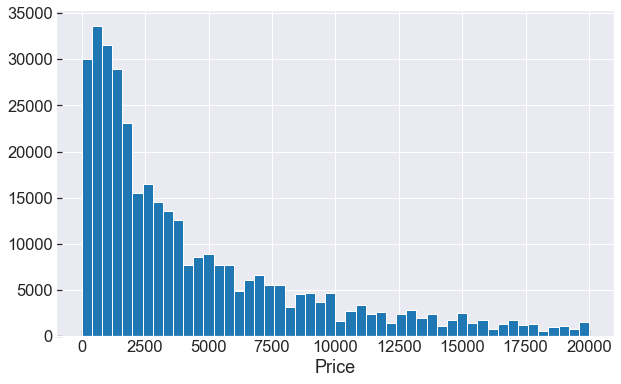

In [5]:
df['Price'].hist(bins=50)

plt.xlabel('Price')

plt.show()

> –î–æ–≤–æ–ª—å–Ω–æ –º–Ω–æ–≥–æ –Ω–µ—Ä–µ–∞–ª–∏—Å–∏—á–Ω–æ –º–∞–ª—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π, –∑–∞–º–µ–Ω—é –∏—Ö –Ω–∞ –º–µ–¥–∏–∞–Ω–Ω–æ–µ (–ø–æ—Å—á–∏—Ç–∞–Ω–Ω–æ–µ –ø–æ—Å–ª–µ –∏—Å–∫–ª—é—á–µ–Ω–∏—è –º–∞–ª—ã—Ö)

In [6]:
# # –ú–∞—à–∏–Ω—ã –¥–µ—à–µ–≤–ª–µ —ç—Ç–æ–≥–æ –ø–æ—Ä–æ–≥–∞ –Ω–∏–∂–µ —Å–µ–±–µ—Å—Ç–æ–∏–º–æ—Å—Ç–∏ –º–∞—Ç–µ—Ä–∏–∞–ª–æ–≤, –∏–∑ –∫–æ—Ç–æ—Ä—ã—Ö –æ–Ω–∏ —Å–¥–µ–ª–∞–Ω—ã
# realistic_price_threshold = 300

# realistic_price_median = df['Price'][df['Price'] > realistic_price_threshold].median()

# df['Price'] = (df['Price']
#                 .where(df['Price'] > realistic_price_threshold, realistic_price_median)
#                 .astype('int'))

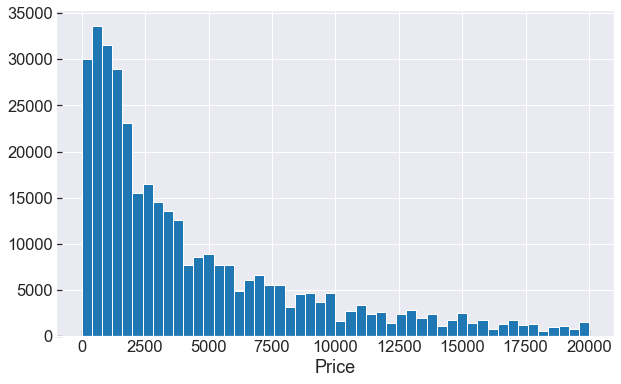

In [7]:
df['Price'].hist(bins=50)

plt.xlabel('Price')

plt.show()

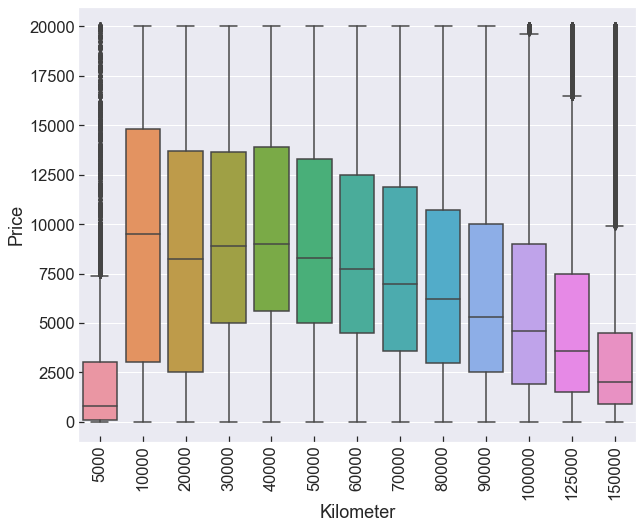

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.boxplot(data=df, x='Kilometer', y='Price', ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

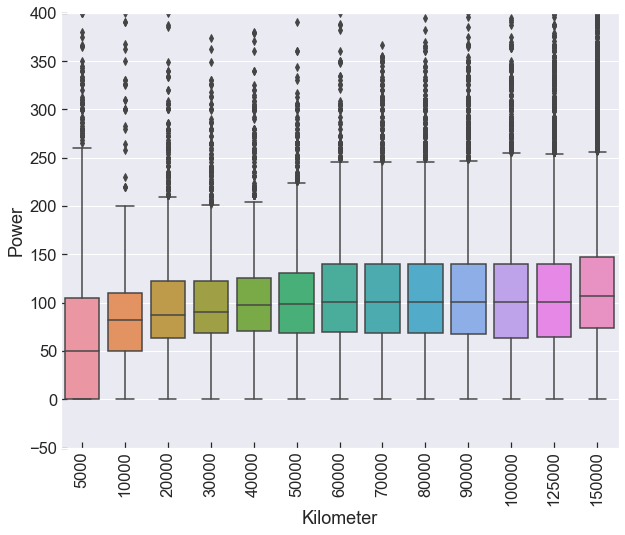

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.boxplot(data=df, x='Kilometer', y='Power', ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# ax.set_yscale('log')
ax.set_ylim(-50, 400)

plt.show()

In [10]:
# profile = ProfileReport(df_5000_km, title="Pandas Profiling Report")

# profile

In [11]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

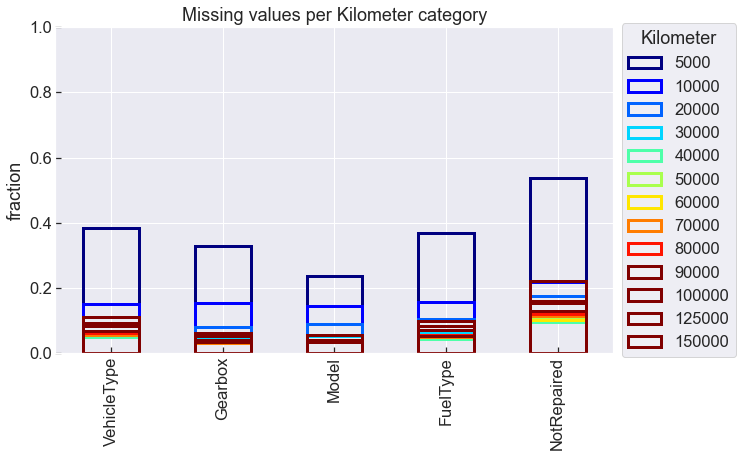

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))

km_list = np.sort(df['Kilometer'].unique())

cmap = get_cmap(10, name='jet')
i = 0 # color iterator

for km in km_list:

    km_df = df[df['Kilometer']==km]

    isna_stat_km = km_df.isna().sum() / km_df.shape[0]

    isna_stat_km[isna_stat_km!=0].plot(kind='bar',
                                       color='None',
                                       lw=3,
                                       ax=ax,
                                       edgecolor=cmap(i),
                                       label=f'{km}')
    ax.set_title(f'{km} km')
    ax.set_ylim(0, 1)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),
              title='Kilometer')
    i+=1

ax.set_title('Missing values per Kilometer category')
ax.set_ylabel('fraction')
plt.show()

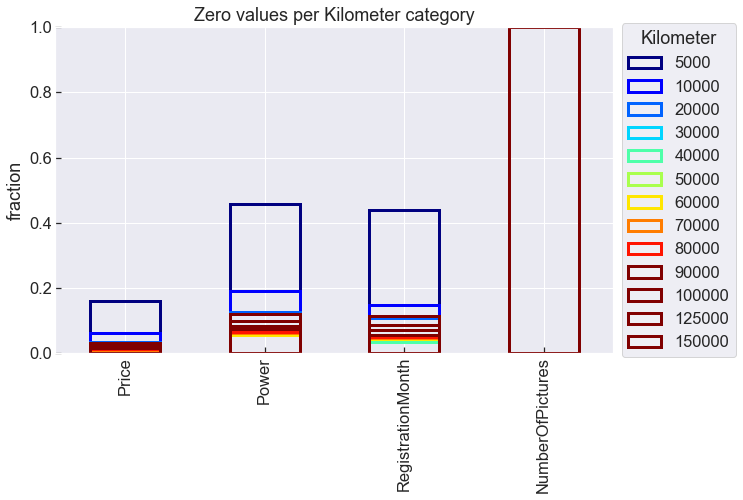

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))

km_list = np.sort(df['Kilometer'].unique())

cmap = get_cmap(10, name='jet')
i = 0 # color iterator

median_prices = []

for km in km_list:

    km_df = df[df['Kilometer']==km]

    iszero_stat_km = (km_df == 0).sum() / km_df.shape[0]

    iszero_stat_km[iszero_stat_km!=0].plot(kind='bar',
                                           color='None',
                                           lw=3,
                                           ax=ax,
                                           edgecolor=cmap(i),
                                           label=f'{km}')
    ax.set_title(f'{km} km')
    ax.set_ylim(0, 1)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),
              title='Kilometer')
    i+=1

ax.set_title('Zero values per Kilometer category')
ax.set_ylabel('fraction')

plt.show()

<div class="alert alert-block alert-warning">
<b> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Å—Ç—É–¥–µ–Ω—Ç–∞</b>
    
–°—É—â–µ—Å—Ç–≤–µ–Ω–Ω–∞—è –¥–æ–ª—è –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –º–∞—à–∏–Ω —Å –ø—Ä–æ–±–µ–≥–æ–º 5000 –∫–º –ø—Ä–æ–ø—É—â–µ–Ω–∞ (–≤ –∫–æ–ª–æ–Ω–∫–∞—Ö VehicleType, Gearbox, Model, FuelType, NotRepaired) –∏–ª–∏ —Ä–∞–≤–Ω–∞ –Ω—É–ª—é (–≤ –∫–æ–ª–æ–Ω–∫–∞—Ö Price, Power, RegistrationMonth, NumberOfPictures). –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–Ω—ã –¥–ª—è —ç—Ç–∏—Ö –º–∞—à–∏–Ω –≤—ã–ø–∞–¥–∞–µ—Ç –∏–∑ –æ–±—â–µ–≥–æ —Ç—Ä–µ–Ω–¥–∞ (–º–µ–Ω—å—à–µ –ø—Ä–æ–±–µ–≥ - –¥–æ—Ä–æ–∂–µ –º–∞—à–∏–Ω–∞). –ü–æ–ø—Ä–æ–±—É—é —É–¥–∞–ª–∏—Ç—å —ç—Ç—É –∫–∞—Ç–µ–≥–æ—Ä–∏—é –∏–∑ –¥–∞—Ç–∞—Å–µ—Ç–∞, –∞ –≤—Å–µ –ø—Ä–æ–ø—É—Å–∫–∏ –≤ —Ü–µ–Ω–µ –∑–∞–º–µ–Ω–∏—Ç—å –Ω–∞ –º–µ–¥–∏–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–æ –≤—Å–µ–º—É –¥–∞—Ç–∞—Ñ—Ä–µ–π–º—É.

</div>

In [14]:
df = df[df['Kilometer']!=5000]

df['Price'] = df['Price'].replace(0, df['Price'].median())

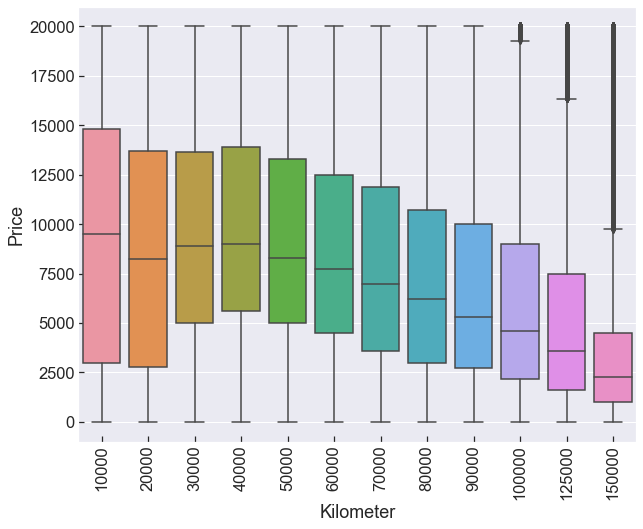

In [72]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.boxplot(data=df, x='Kilometer', y='Price', ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

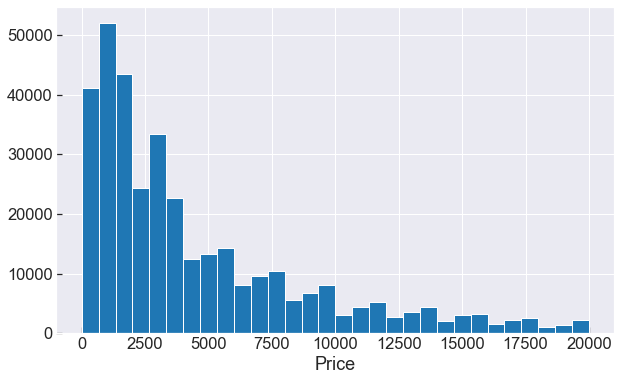

In [15]:
df['Price'].hist(bins=30)

plt.xlabel('Price')

plt.show()

In [16]:
# profile = ProfileReport(init_df, title="Pandas Profiling Report")

# profile

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347972 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        347972 non-null  object
 1   Price              347972 non-null  int64 
 2   VehicleType        312930 non-null  object
 3   RegistrationYear   347972 non-null  int64 
 4   Gearbox            330243 non-null  object
 5   Power              347972 non-null  int64 
 6   Model              329777 non-null  object
 7   Kilometer          347972 non-null  int64 
 8   RegistrationMonth  347972 non-null  int64 
 9   FuelType           317445 non-null  object
 10  Brand              347972 non-null  object
 11  NotRepaired        280249 non-null  object
 12  DateCreated        347972 non-null  object
 13  NumberOfPictures   347972 non-null  int64 
 14  PostalCode         347972 non-null  int64 
 15  LastSeen           347972 non-null  object
dtypes: int64(7), object(

In [18]:
# profile = ProfileReport(df, title="Pandas Profiling Report")

# profile

### –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –∏ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤

In [19]:
df.columns

Index(['DateCrawled', 'Price', 'VehicleType', 'RegistrationYear', 'Gearbox',
       'Power', 'Model', 'Kilometer', 'RegistrationMonth', 'FuelType', 'Brand',
       'NotRepaired', 'DateCreated', 'NumberOfPictures', 'PostalCode',
       'LastSeen'],
      dtype='object')

In [20]:
# –î–æ–ø—É—Å–∫–∞—é, —á—Ç–æ —Ü–µ–Ω–∞ –Ω–∞ –∞–≤—Ç–æ –º–æ–∂–µ—Ç –∑–∞–≤–∏—Å–µ—Ç—å –æ—Ç –¥–∞—Ç—ã —Å–æ–∑–¥–∞–Ω–∏—è –æ–±—ä—è–≤–ª–µ–Ω–∏—è: —Å–∏—Ç—É–∞—Ü–∏—è –Ω–∞ —Ä—ã–Ω–∫–µ 
# –≤—Ç–æ—Ä–∏—á–Ω—ã—Ö –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π –∏–∑–º–µ–Ω—á–∏–≤–∞
creation_date = pd.to_datetime(df['DateCreated'])

df['CreationYear'] = creation_date.dt.year
df['CreationMonth'] = creation_date.dt.month
df['CreationDay'] = creation_date.dt.day

# –ê –≤–æ—Ç –¥–∞—Ç—ã 'DateCrawled' –∏ 'LastSeen', –∞ —Ç–∞–∫–∂–µ –ø–æ—á—Ç–æ–≤—ã–π –∫–æ–¥ –Ω–µ –≤–∏–∂—É —Å–º—ã—Å–ª–∞ –æ—Å—Ç–∞–≤–ª—è—Ç—å —Å—Ä–µ–¥–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.
# –ö–æ–ª–æ–Ω–∫–∞ 'NumberOfPictures' –∑–∞–ø–æ–ª–Ω–µ–Ω–∞ –Ω—É–ª—è–º–∏, –µ–µ –∂–¥–µ—Ç —Ç–∞ –∂–µ —Å—É–¥—å–±–∞
df = df.drop(columns=['DateCreated', 'DateCrawled', 'LastSeen',
                      'PostalCode', 'NumberOfPictures'])

df.columns

Index(['Price', 'VehicleType', 'RegistrationYear', 'Gearbox', 'Power', 'Model',
       'Kilometer', 'RegistrationMonth', 'FuelType', 'Brand', 'NotRepaired',
       'CreationYear', 'CreationMonth', 'CreationDay'],
      dtype='object')

In [21]:
# 'gasoline' –∏ 'petrol' –æ–±–æ–∑–Ω–∞—á–∞—é—Ç –æ–¥–Ω–æ –∏ —Ç–æ –∂–µ -- –±–µ–Ω–∑–∏–Ω
df['FuelType'] = df['FuelType'].replace('gasoline', 'petrol')

df['FuelType'].value_counts(normalize=True)

petrol      0.980198
lpg         0.016570
cng         0.001748
hybrid      0.000725
other       0.000504
electric    0.000255
Name: FuelType, dtype: float64

In [22]:
df.isna().sum()[df.isna().sum()!=0]

VehicleType    35042
Gearbox        17729
Model          18195
FuelType       30527
NotRepaired    67723
dtype: int64

In [23]:
# –°–ª—É—á–∞–π–Ω—ã–π –∞–≤—Ç–æ–º–æ–±–∏–ª—å —Å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é 75% –±—É–¥–µ—Ç —Å —Ä—É—á–Ω–æ–π –∫–æ—Ä–æ–±–∫–æ–π –ø–µ—Ä–µ–¥–∞—á
df['Gearbox'] = df['Gearbox'].fillna('manual')
# –°–ª—É—á–∞–π–Ω—ã–π –∞–≤—Ç–æ–º–æ–±–∏–ª—å —Å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é 98% –±—É–¥–µ—Ç —Ä–∞–±–æ—Ç–∞—Ç—å –Ω–∞ –±–µ–Ω–∑–∏–Ω–µ
df['FuelType'] = df['FuelType'].fillna('petrol')
# –°–ª—É—á–∞–π–Ω—ã–π –∞–≤—Ç–æ–º–æ–±–∏–ª—å —Å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é 70% –ø–æ–±—ã–≤–∞–ª –≤ —Ä–µ–º–æ–Ω—Ç–µ
df['NotRepaired'] = df['NotRepaired'].fillna('no')

<!-- `VehicleType` –ø—Ä–∏–¥–µ—Ç—Å—è –∑–∞–º–µ–Ω–∏—Ç—å, –∞ –≤–æ—Ç `Model` –ø—Ä–æ—Å—Ç–æ —É–±–µ—Ä—É –∏–∑ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: —Å–ª–∏—à–∫–æ–º –º–Ω–æ–≥–æ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –¥–ª—è —Ñ–æ—Ä–º—É–ª–∏—Ä–æ–≤–∞–Ω–∏—è –∞–¥–µ–∫–≤–∞—Ç–Ω–æ–≥–æ —Å–ø–æ—Å–æ–±–∞ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è –ø—Ä–æ–ø—É—Å–∫–æ–≤. -->

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347972 entries, 0 to 354368
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Price              347972 non-null  int64 
 1   VehicleType        312930 non-null  object
 2   RegistrationYear   347972 non-null  int64 
 3   Gearbox            347972 non-null  object
 4   Power              347972 non-null  int64 
 5   Model              329777 non-null  object
 6   Kilometer          347972 non-null  int64 
 7   RegistrationMonth  347972 non-null  int64 
 8   FuelType           347972 non-null  object
 9   Brand              347972 non-null  object
 10  NotRepaired        347972 non-null  object
 11  CreationYear       347972 non-null  int64 
 12  CreationMonth      347972 non-null  int64 
 13  CreationDay        347972 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 39.8+ MB


In [25]:
# –ò–∑–º–µ–Ω—é —Ç–∏–ø –¥–∞–Ω–Ω—ã—Ö 'object' –Ω–∞ 'category' –¥–ª—è —Å–æ–≤–º–µ—Å—Ç–∏–º–æ—Å—Ç–∏ —Å lightGBM
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347972 entries, 0 to 354368
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Price              347972 non-null  int64   
 1   VehicleType        312930 non-null  category
 2   RegistrationYear   347972 non-null  int64   
 3   Gearbox            347972 non-null  category
 4   Power              347972 non-null  int64   
 5   Model              329777 non-null  category
 6   Kilometer          347972 non-null  int64   
 7   RegistrationMonth  347972 non-null  int64   
 8   FuelType           347972 non-null  category
 9   Brand              347972 non-null  category
 10  NotRepaired        347972 non-null  category
 11  CreationYear       347972 non-null  int64   
 12  CreationMonth      347972 non-null  int64   
 13  CreationDay        347972 non-null  int64   
dtypes: category(6), int64(8)
memory usage: 26.2 MB


## –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π

### LightGBM

In [26]:
X = df.drop(columns=['Price'])
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

catetory_columns = list(X.select_dtypes(include=['category']).columns)

catetory_columns

['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']

In [27]:
lgbm_model = LGBMRegressor(random_state=42, metric='rmse')

In [28]:
%%time
lgbm_model.fit(X_train, y_train, categorical_feature=catetory_columns)

/Users/mike/opt/anaconda3/envs/practicum_new/lib/python3.10/site-packages/lightgbm/basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


CPU times: user 4.67 s, sys: 652 ms, total: 5.32 s
Wall time: 930 ms


LGBMRegressor(metric='rmse', random_state=42)

In [29]:
lgbm_predictions = lgbm_model.predict(X_test)

lgbm_rmse = mse(y_test, lgbm_predictions) ** 0.5

print(f'LightGBM RMSE: {lgbm_rmse:.0f}')

LightGBM RMSE: 1717


In [30]:
from sklearn.model_selection import RandomizedSearchCV

In [31]:
param_grid = {
    'num_leaves': np.arange(500, 1200, 20),
    'min_data_in_leaf': [30, 40, 50, 80]
    }

In [32]:
random_search_lgbm = RandomizedSearchCV(
    estimator=lgbm_model,
    param_distributions=param_grid,
    n_iter=10,
    cv=3,
    scoring='neg_root_mean_squared_error',
    verbose=50,
    random_state=42
)

In [33]:
%%time
random_search_lgbm.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START min_data_in_leaf=80, num_leaves=560........................
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[CV 1/3; 1/10] END min_data_in_leaf=80, num_leaves=560;, score=-1643.660 total time=   5.0s
[CV 2/3; 1/10] START min_data_in_leaf=80, num_leaves=560........................
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[CV 2/3; 1/10] END min_data_in_leaf=80, num_leaves=560;, score=-1657.528 total time=   5.1s
[CV 3/3; 1/10] START min_data_in_leaf=80, num_leaves=560........................
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[CV 3/3; 1/10] END min_data_in_leaf=80, num_leaves=560;, score=-1645.512 total time=   4.7s
[CV 1/3; 2/10] START min_data_in_leaf=40, num_leaves=1

RandomizedSearchCV(cv=3,
                   estimator=LGBMRegressor(metric='rmse', random_state=42),
                   param_distributions={'min_data_in_leaf': [30, 40, 50, 80],
                                        'num_leaves': array([ 500,  520,  540,  560,  580,  600,  620,  640,  660,  680,  700,
        720,  740,  760,  780,  800,  820,  840,  860,  880,  900,  920,
        940,  960,  980, 1000, 1020, 1040, 1060, 1080, 1100, 1120, 1140,
       1160, 1180])},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=50)

In [34]:
-random_search_lgbm.best_score_

1643.7972784114818

In [35]:
random_search_lgbm.best_params_

{'num_leaves': 1140, 'min_data_in_leaf': 40}

In [36]:
random_lgbm_predictions = random_search_lgbm.predict(X_test)

lgbm_rmse = mse(y_test, random_lgbm_predictions) ** 0.5

print(f'LightGBM RMSE: {lgbm_rmse:.2f}')

LightGBM RMSE: 1606.63


### –¢–µ—Å—Ç—ã –Ω–∞ —Å—Ç–æ—Ä–æ–Ω–Ω–∏—Ö –¥–∞–Ω–Ω—ã—Ö

In [37]:
honda_test_df = pd.Series(
          {'VehicleType': 'small',
          'RegistrationYear': 2006,
          'Gearbox': 'manual',
          'Power': 83,
          'Model': 'fit',
          'Kilometer': 95000,
          'RegistrationMonth': 1,
          'FuelType': 'petrol',
          'Brand': 'honda',
          'NotRepaired': 'no',
          'CreationYear': 2016,
          'CreationMonth': 6,
          'CreationDay': 6})

honda_test_df = pd.DataFrame(honda_test_df).T

honda_test_df

VehicleType RegistrationYear Gearbox Power Model Kilometer  \
0       small             2006  manual    83   fit     95000   

  RegistrationMonth FuelType  Brand NotRepaired CreationYear CreationMonth  \
0                 1   petrol  honda          no         2016             6   

  CreationDay  
0           6

In [38]:
honda_test_less_km_df = pd.Series(
          {'VehicleType': 'small',
          'RegistrationYear': 2006,
          'Gearbox': 'manual',
          'Power': 83,
          'Model': 'fit',
          'Kilometer': 5000,
          'RegistrationMonth': 1,
          'FuelType': 'petrol',
          'Brand': 'honda',
          'NotRepaired': 'no',
          'CreationYear': 2016,
          'CreationMonth': 6,
          'CreationDay': 6})

honda_test_less_km_df = pd.DataFrame(honda_test_less_km_df).T

honda_test_less_km_df

VehicleType RegistrationYear Gearbox Power Model Kilometer  \
0       small             2006  manual    83   fit      5000   

  RegistrationMonth FuelType  Brand NotRepaired CreationYear CreationMonth  \
0                 1   petrol  honda          no         2016             6   

  CreationDay  
0           6

In [39]:
volvo_test_df = pd.Series(
          {'VehicleType': 'crossover',
          'RegistrationYear': 2016,
          'Gearbox': 'auto',
          'Power': 190,
          'Model': 'XC60',
          'Kilometer': 135000,
          'RegistrationMonth': 1,
          'FuelType': 'disel',
          'Brand': 'volvo',
          'NotRepaired': 'no',
          'CreationYear': 2016,
          'CreationMonth': 6,
          'CreationDay': 6})

volvo_test_df = pd.DataFrame(volvo_test_df).T

volvo_test_df

VehicleType RegistrationYear Gearbox Power Model Kilometer  \
0   crossover             2016    auto   190  XC60    135000   

  RegistrationMonth FuelType  Brand NotRepaired CreationYear CreationMonth  \
0                 1    disel  volvo          no         2016             6   

  CreationDay  
0           6

In [73]:
volvo_test_less_km_df = pd.Series(
          {'VehicleType': 'crossover',
          'RegistrationYear': 2016,
          'Gearbox': 'auto',
          'Power': 190,
          'Model': 'XC60',
          'Kilometer': 35000,
          'RegistrationMonth': 1,
          'FuelType': 'disel',
          'Brand': 'volvo',
          'NotRepaired': 'no',
          'CreationYear': 2016,
          'CreationMonth': 6,
          'CreationDay': 6})

volvo_test_less_km_df = pd.DataFrame(volvo_test_less_km_df).T

volvo_test_less_km_df

VehicleType RegistrationYear Gearbox Power Model Kilometer  \
0   crossover             2016    auto   190  XC60     35000   

  RegistrationMonth FuelType  Brand NotRepaired CreationYear CreationMonth  \
0                 1    disel  volvo          no         2016             6   

  CreationDay  
0           6

In [74]:
def prepare_test(sila_df):

    for column in catetory_columns:
        sila_df[column] = sila_df[column].astype('category')

    # –ò–∑–º–µ–Ω—é —Ç–∏–ø –¥–∞–Ω–Ω—ã—Ö 'object' –Ω–∞ 'category' –¥–ª—è —Å–æ–≤–º–µ—Å—Ç–∏–º–æ—Å—Ç–∏ —Å lightGBM
    for column in sila_df.select_dtypes(include=['object']).columns:
        sila_df[column] = sila_df[column].astype('int64')

    return sila_df

In [75]:
volvo_test_less_km_df

VehicleType RegistrationYear Gearbox Power Model Kilometer  \
0   crossover             2016    auto   190  XC60     35000   

  RegistrationMonth FuelType  Brand NotRepaired CreationYear CreationMonth  \
0                 1    disel  volvo          no         2016             6   

  CreationDay  
0           6

In [76]:
volvo_test_df = prepare_test(volvo_test_df)
volvo_test_less_km_df = prepare_test(volvo_test_less_km_df)
honda_test_df = prepare_test(honda_test_df)
honda_test_less_km_df = prepare_test(honda_test_less_km_df)

__–ü—Ä–∏ —É–º–µ–Ω—å—à–µ–Ω–∏–∏ –ø—Ä–æ–±–µ–≥–∞ —Ü–µ–Ω–∞ –ø–∞–¥–∞–µ—Ç:__

ü§î

In [77]:
random_search_lgbm.predict(volvo_test_df)[0], random_search_lgbm.predict(volvo_test_less_km_df)[0]

(8907.188136667288, 6610.8291791026295)

In [78]:
random_search_lgbm.predict(honda_test_df)[0], random_search_lgbm.predict(honda_test_less_km_df)[0]

(4019.5719320606045, 4837.686358956837)

<div class="alert alert-block alert-warning">
<b> –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Å—Ç—É–¥–µ–Ω—Ç–∞</b>
    
–≠—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–º —Ç–æ–≥–æ, —á—Ç–æ –º–æ–¥–µ–ª—å –æ–±—É—á–µ–Ω–∞ –Ω–µ–≤–µ—Ä–Ω–æ?

–ò–ª–∏, –Ω–∞–ø—Ä–∏–º–µ—Ä, –ø—Ä–æ–±–ª–µ–º—ã —Å –¥–∞–Ω–Ω—ã–º–∏?

</div>

### Linear regression

In [46]:
# Encoding
X_train_ohe = X_train.drop(columns=['Brand', 'Model'])
X_train_ohe = pd.get_dummies(X_train_ohe)

X_test_ohe = X_test.drop(columns=['Brand', 'Model'])
X_test_ohe = pd.get_dummies(X_test_ohe)

In [47]:
numerical_columns = list(X_train_ohe.select_dtypes(include=['int64']).columns)

numerical_columns

['RegistrationYear',
 'Power',
 'Kilometer',
 'RegistrationMonth',
 'CreationYear',
 'CreationMonth',
 'CreationDay']

In [48]:
# Scaling
scaler = StandardScaler()
scaler.fit(X_train_ohe[numerical_columns])

X_train_ohe[numerical_columns] = scaler.transform(X_train_ohe[numerical_columns])
X_test_ohe[numerical_columns] = scaler.transform(X_test_ohe[numerical_columns])

In [49]:
linear_model = LinearRegression()

In [50]:
%time
linear_model.fit(X_train_ohe, y_train)

CPU times: user 1 ¬µs, sys: 1e+03 ns, total: 2 ¬µs
Wall time: 3.1 ¬µs


LinearRegression()

In [51]:

linear_predictions = linear_model.predict(X_test_ohe)
linear_rmse = mse(y_test, linear_predictions) ** 0.5

print(f'Linear RMSE: {linear_rmse:.0f}')

Linear RMSE: 3562


## –ê–Ω–∞–ª–∏–∑ –º–æ–¥–µ–ª–µ–π

–ü—Ä–æ—Å—Ç–∞—è –ª–∏–Ω–µ–π–Ω–∞—è –º–æ–¥–µ–ª—å –æ–±—É—á–∞–µ—Ç—Å—è –æ—á–µ–Ω—å –±—ã—Å—Ç—Ä–æ (–º–∏–∫—Ä–æ—Å–µ–∫—É–Ω–¥—ã), –Ω–æ –≤ –µ–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è—Ö –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É—é—Ç –±–æ–ª—å—à–∏–µ –æ—à–∏–±–∫–∏ (–º–µ—Ç—Ä–∏–∫–∞ RMSE —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç 3687. –ü–æ–¥–±–æ—Ä –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∏ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ –±—É—Å—Ç–∏–Ω–≥–∞ LightGBM –∑–∞–Ω–∏–º–∞–µ—Ç –≥–æ—Ä–∞–∑–¥–æ –±–æ–ª—å—à–µ –≤—Ä–µ–º–µ–Ω–∏ (–æ–∫–æ–ª–æ 3 –º–∏–Ω—É—Ç), –Ω–æ –ø—Ä–∏ —ç—Ç–æ–º –æ—à–∏–±–∫–∞ RMSE —Å–æ–∫—Ä–∞—â–∞–µ—Ç—Å—è –±–æ–ª–µ–µ —á–µ–º –Ω–∞ 50% (–¥–æ 1644).

## –ß–µ–∫-–ª–∏—Å—Ç –ø—Ä–æ–≤–µ—Ä–∫–∏

–ü–æ—Å—Ç–∞–≤—å—Ç–µ 'x' –≤ –≤—ã–ø–æ–ª–Ω–µ–Ω–Ω—ã—Ö –ø—É–Ω–∫—Ç–∞—Ö. –î–∞–ª–µ–µ –Ω–∞–∂–º–∏—Ç–µ Shift+Enter.

- [x]  Jupyter Notebook –æ—Ç–∫—Ä—ã—Ç
- [x]  –í–µ—Å—å –∫–æ–¥ –≤—ã–ø–æ–ª–Ω—è–µ—Ç—Å—è –±–µ–∑ –æ—à–∏–±–æ–∫
- [x]  –Ø—á–µ–π–∫–∏ —Å –∫–æ–¥–æ–º —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω—ã –≤ –ø–æ—Ä—è–¥–∫–µ –∏—Å–ø–æ–ª–Ω–µ–Ω–∏—è
- [x]  –í—ã–ø–æ–ª–Ω–µ–Ω–∞ –∑–∞–≥—Ä—É–∑–∫–∞ –∏ –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö
- [x]  –í—ã–ø–æ–ª–Ω–µ–Ω–æ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π
- [x]  –ï—Å—Ç—å –∞–Ω–∞–ª–∏–∑ —Å–∫–æ—Ä–æ—Å—Ç–∏ —Ä–∞–±–æ—Ç—ã –∏ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–µ–π